In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [345]:
df= pd.read_csv('data/Mall_Customers.xls')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Preprocessing and cleaning

In [346]:
df=df.drop(['CustomerID'],axis=1) # dropping redundant column
df['Gender']=df['Gender'].map({"Male":1,"Female":0}) # mapping categorical data with binary numeric data
df.rename(columns={'Annual Income (k$)':'Annual_Income($)','Spending Score (1-100)':'Spending_score(1-100)'},inplace=True)

[]

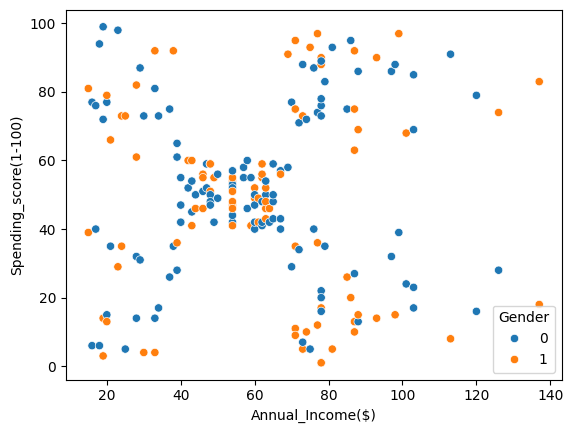

In [347]:
sns.scatterplot(x='Annual_Income($)',y='Spending_score(1-100)', data=df,hue='Gender')
plt.plot()


# Cluster Testing

## Elbow method and Sillhoute Score (2-Features)

In [348]:
# Feature Selection
X = df[[ 'Annual_Income($)', 'Spending_score(1-100)']]

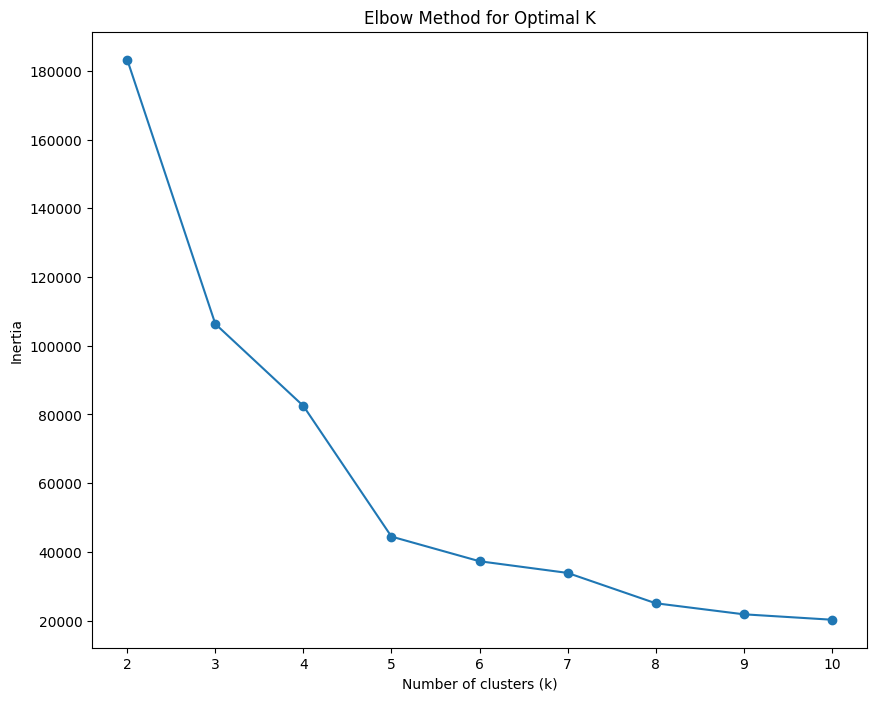

In [349]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=29, n_init='auto')
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(10,8))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Elbow method curve for 2 feautres shows abrupt bend for k=5 

In [350]:
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=29, n_init='auto')
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")

k=2, Silhouette Score=0.283
k=3, Silhouette Score=0.468
k=4, Silhouette Score=0.415
k=5, Silhouette Score=0.554
k=6, Silhouette Score=0.538
k=7, Silhouette Score=0.470
k=8, Silhouette Score=0.454
k=9, Silhouette Score=0.460
k=10, Silhouette Score=0.445


## Elbow method and Sillhoute Score (all feautres)

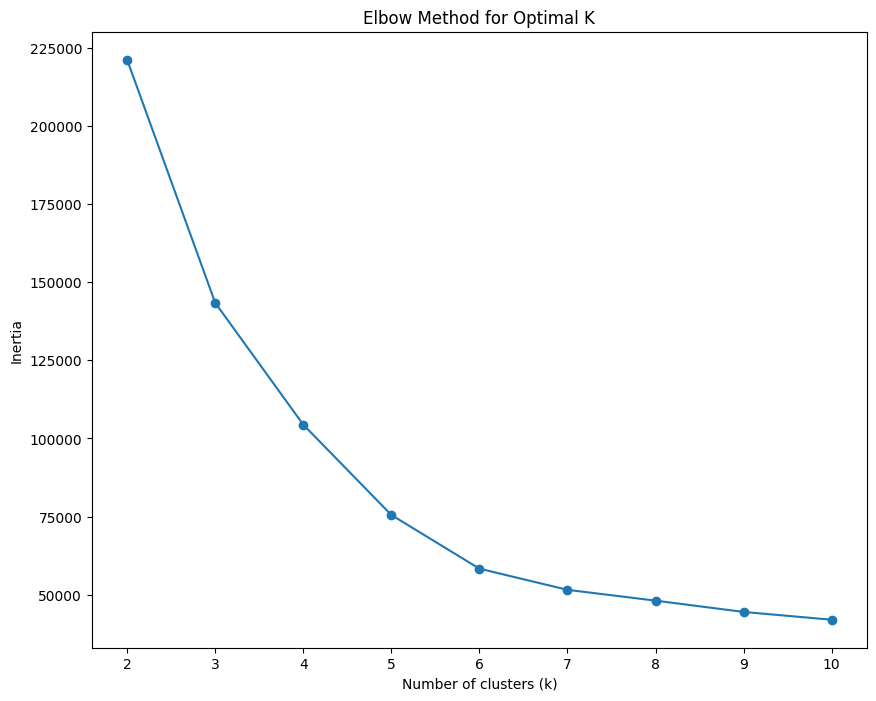

In [351]:
X_all = df[[ 'Annual_Income($)', 'Spending_score(1-100)','Gender','Age']]

inertia = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=29, n_init='auto')
    km.fit(X_all)
    inertia.append(km.inertia_)

plt.figure(figsize=(10,8))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Elbow method for all features results were inconclusive since there is no clear sharp bend in the curve to determine optimal K value.

In [352]:
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=29, n_init='auto')
    labels = km.fit_predict(X_all)
    score = silhouette_score(X, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")

k=2, Silhouette Score=0.327
k=3, Silhouette Score=0.468
k=4, Silhouette Score=0.460
k=5, Silhouette Score=0.534
k=6, Silhouette Score=0.310
k=7, Silhouette Score=0.301
k=8, Silhouette Score=0.294
k=9, Silhouette Score=0.251
k=10, Silhouette Score=0.239


For K=5 
Sillhoute Score is maximum= .534

# Fitting K-means model with optimal values

In [353]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=29, n_init='auto')
y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans
df.head()

,Gender,Age,Annual_Income($),Spending_score(1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,4
2,0,20,16,6,2
3,0,23,16,77,4
4,0,31,17,40,2


# Visualising Clusters

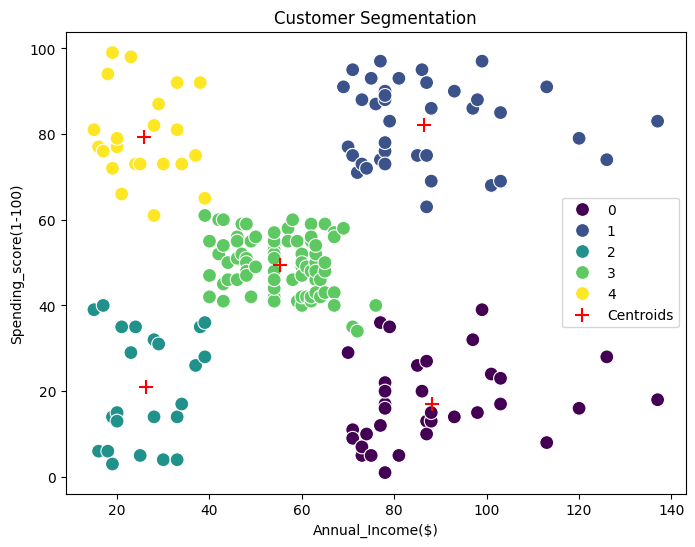

In [354]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual_Income($)', y='Spending_score(1-100)',
                hue='Cluster', data=df, palette='viridis', s=100)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='+', label='Centroids')

plt.title('Customer Segmentation')
plt.legend()
plt.show()


In [355]:
cluster_summary = df.groupby('Cluster').agg({
    'Gender': lambda x: x.value_counts().index[0],  # to give majority Gender
    'Age': 'median',
    'Annual_Income($)': 'mean',
    'Spending_score(1-100)': 'mean'
})

cluster_summary['Gender'] = cluster_summary['Gender'].map({0: 'Female', 1: 'Male'})
print(cluster_summary)


         Gender   Age  Annual_Income($)  Spending_score(1-100)
Cluster                                                       
0          Male  42.0         88.200000              17.114286
1        Female  32.0         86.538462              82.128205
2        Female  46.0         26.304348              20.913043
3        Female  46.0         55.296296              49.518519
4        Female  23.5         25.727273              79.363636


# Interpretation of Clusters
- Cluster-0: Majority of Middle aged Men (High Income- Low Spenders)
- Cluster-1: Majorly Women (High Income- High Spenders, best cluster for retention of business)
- Cluster-2: Majority women (Low Income- Low Spenders)
- Cluster-3: Majority middle-aged Women(average Income- Average spending)
- Cluster-4: majority Young women (Low income- High Spending)